# Datensätze
Author: Jakob Jerratsch

Für diese Arbeit nutze ich zwei Datensätze mit Songs von Spotify. 
Der erste beinhaltet die 10.000 erfolgreichsten Songs aus den Jahren 1950-2024 auf Spotify (Stand 2024) mit Release-Datum.
Der zweite enthält fast 1.000.000 Songs mit dazugehörigen Songtexten.
Außerdem erstelle ich einen dritten Datensatz, in dem ich die beiden Datensätze zusammenführe, um die Songtexte der Hit-Songs zu bekommen.

Beide Datensätze enthalten die Metadaten von Spotify, die "Spotify-Attribute", mit denen Spotify den Songs Werte gibt, um sie miteinander zu vergleichen. Im ersten Datensatz sind noch weitere Metadaten enthalten, im zweiten die Songtexte.
Ich werde in dieser Arbeit beide Datensätze analysieren und miteinander vergleichen, um herauszufinden, ob und wie sich die 10.000 erfolgreichsten Songs von der großen Menge der fast 1 Millionen Songs unterscheiden.

Im dritten Teil analysiere ich die Texte der Songs und suche in den Texten nach Gemeinsamkeiten und Unterschieden.

# Teil 1
## Daten aufbereiten
In diesem Vorbereitungsteil bearbeite ich die Datensätze und erstelle neue, erweiterte und gefilterte Versionen von ihnen, die ich dann in Teil 2 analysiere. 

Ich suche nach fehlenden Werten und mehrfachen Einträgen, erstelle Spalten für Release-Dates und einen dritten Dataframe, der die beiden Datensätze zusammenführt.

### QUELLEN
Datensatz 1 - Quelle: https://www.kaggle.com/datasets/joebeachcapital/top-10000-spotify-songs-1960-now

Datensatz 2 - Quelle: https://www.kaggle.com/datasets/bwandowando/spotify-songs-with-attributes-and-lyrics

In [1]:
#Daten importieren
import pandas as pd

df1 = pd.read_csv('top_10000_1950-now.csv')
df2 = pd.read_csv('songs_with_attributes_and_lyrics.csv')

In [2]:
#Allgemeine Infos zu den Datensätzen
print(df1.info())
print(df1.head())
print(df2.info())
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             10000 non-null  object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9998 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9998 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9998 non-null   object 
 7   Album Artist Name(s)  9998 non-null   object 
 8   Album Release Date    9998 non-null   object 
 9   Album Image URL       9996 non-null   object 
 10  Disc Number           10000 non-null  int64  
 11  Track Number          10000 non-null  int64  
 12  Track Duration (ms)   10000 non-null  int64  
 13  Track Preview URL     9937 non-null   object 
 14  Explicit              10000 non-null  bool   
 15  Popularity          

In [3]:
#Fehlende Werte finden
missing_values = df1.isnull().sum()
print(missing_values[missing_values > 0])

Track Name                  2
Artist URI(s)               2
Artist Name(s)              2
Album URI                   2
Album Name                  2
Album Artist URI(s)         2
Album Artist Name(s)        2
Album Release Date          2
Album Image URL             4
Track Preview URL          63
ISRC                        4
Artist Genres             551
Danceability                5
Energy                      5
Key                         5
Loudness                    5
Mode                        5
Speechiness                 5
Acousticness                5
Instrumentalness            5
Liveness                    5
Valence                     5
Tempo                       5
Time Signature              5
Album Genres            10000
Label                       7
Copyrights                 23
dtype: int64


Wie wir sehen, gibt es zwei Songs, zu denen fast keine Daten vorhanden sind, diese lösche ich. Weiterhin fünf Songs, zu denen die Spotify-Attribute fehlen. 

Weiterhin ist die Spalte Album Genres komplett leer ist, es fehlen alle 10000 Einträge. Diese Spalte wird gelöscht.

Dann fehlen hauptstächlich noch Genre-Zuordnungen, was immerhin 551 Songs und damit 5% der Daten betrifft. 5% der Daten sind natürlich eine große Menge, wenn es um statistisch relevante Aussagen geht, aber mit 95% der Genres kann ich gut einschätzen, wie die Genres im Großen und Ganzen verteilt sind.

Weiterhin fehlen 63 Track Preview URLs und 23 Copyrights, was für diese Analyse nicht weiter stört. Die restlichen fehlenden Werte sind in einem vernachlässigbaren Bereich.

Schauen wir uns zuerst die Daten der unzureichenden Songs an:

In [4]:
# Zeilen anzeigen, in denen entweder der Track Name oder der Artist Name fehlt
missing_values = df1[df1['Track Name'].isnull() | df1['Artist Name(s)'].isnull()]
print("Zeilen mit fehlendem Track Name oder Artist Name:")
print(missing_values)

Zeilen mit fehlendem Track Name oder Artist Name:
                                 Track URI Track Name  \
387   spotify:track:1C79CxJdMHjk9RkwX04DRh        NaN   
6778  spotify:track:4FtEKK21hvAqtn3LRT6tW2        NaN   

                              Artist URI(s) Artist Name(s)  \
387   spotify:artist:0LyfQWJT6nXafLPZqxe9Of            NaN   
6778  spotify:artist:0LyfQWJT6nXafLPZqxe9Of            NaN   

                                 Album URI Album Name  \
387   spotify:album:535qZk6ycJqQaa5qFPmq3k        NaN   
6778  spotify:album:58rbGtypokiMYSrfXDlAgN        NaN   

                        Album Artist URI(s) Album Artist Name(s)  \
387   spotify:artist:0LyfQWJT6nXafLPZqxe9Of      Various Artists   
6778  spotify:artist:0LyfQWJT6nXafLPZqxe9Of      Various Artists   

     Album Release Date Album Image URL  ...  Speechiness  Acousticness  \
387                0000             NaN  ...       0.0519        0.0228   
6778               0000             NaN  ...       0.0387       

Die Zeilen 387 und 6778 beinhalten keine für diese Analyse relevanten Informationen und können gelöscht werden.

In [5]:
# Lösche die Zeilen 387 und 6778 aus df1
df1.drop(index=[387, 6778], inplace=True)

# Überprüfe die neuen Dimensionen des DataFrames
print("DataFrame nach dem Löschen der Zeilen 387 und 6778:")
print(df1.info())

DataFrame nach dem Löschen der Zeilen 387 und 6778:
<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9998 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9996 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9996 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9996 non-null   object 
 7   Album Artist Name(s)  9996 non-null   object 
 8   Album Release Date    9996 non-null   object 
 9   Album Image URL       9996 non-null   object 
 10  Disc Number           9998 non-null   int64  
 11  Track Number          9998 non-null   int64  
 12  Track Duration (ms)   9998 non-null   int64  
 13  Track Preview URL     9937 non-null   object 
 14  Explicit              999

Weiterhin löschen wir die Spalte Album Genres:

In [6]:
# Lösche die Spalte 'Album Genres' aus df1
df1.drop(columns=['Album Genres'], inplace=True)

# Überprüfe die neuen Dimensionen des DataFrames
print("DataFrame nach dem Löschen der Spalte 'Album Genres':")
print(df1.info())

DataFrame nach dem Löschen der Spalte 'Album Genres':
<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9998 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9996 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9996 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9996 non-null   object 
 7   Album Artist Name(s)  9996 non-null   object 
 8   Album Release Date    9996 non-null   object 
 9   Album Image URL       9996 non-null   object 
 10  Disc Number           9998 non-null   int64  
 11  Track Number          9998 non-null   int64  
 12  Track Duration (ms)   9998 non-null   int64  
 13  Track Preview URL     9937 non-null   object 
 14  Explicit              9

In [7]:
# Zeilen anzeigen, in denen Danceability fehlt
missing_danceability = df1[df1['Danceability'].isnull()]
print("Zeilen mit fehlender Danceability:")
print(missing_danceability)

Zeilen mit fehlender Danceability:
                                              Track URI  \
2079  spotify:local:The+Beatles:1962-1966:You%27ve+G...   
2179               spotify:track:5cY8y2XgOfkAh4kSWLFKkz   
2927               spotify:track:4G4JPYTyBTUHMRA3LIueZm   
6980               spotify:track:6yuvC80FcnVJNvC0DbXN9e   
7565  spotify:local:Koo+De+Tah:Too+Young+For+Promise...   

                                 Track Name  \
2079      You've Got To Hide Your Love Away   
2179             I Write Sins Not Tragedies   
2927                              Your Song   
6980  Come to Me (feat. Nicole Scherzinger)   
7565                 Too Young For Promises   

                                          Artist URI(s)  \
2079                                                NaN   
2179              spotify:artist:20JZFwl6HVl6yg8a4H3ZqK   
2927              spotify:artist:3PhoLpVuITZKcymswpck5b   
6980  spotify:artist:59wfkuBoNyhDMQGCljbUbA, spotify...   
7565                            

#### Versuch: Die fehlenden Daten von Spotify herunterladen und den DataFrame ergänzen

In [8]:
#!pip install spotipy

In [9]:
"""
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Authentifizierung
#client_id = '...'
#client_secret = '...'
credentials = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=credentials)

# Funktion zum Abrufen der Danceability
def get_danceability(track_uri):
    try:
        track_info = sp.track(track_uri)
        return track_info['danceability']
    except Exception as e:
        print(f"Fehler beim Abrufen von {track_uri}: {e}")
        return None

# Iteriere über die Zeilen mit fehlender Danceability
for index, row in df1[df1['Danceability'].isnull()].iterrows():
    track_uri = row['Track URI']
    danceability = get_danceability(track_uri)
    df1.at[index, 'Danceability'] = danceability

# Überprüfe die aktualisierten Werte
print(df1[df1['Danceability'].isnull()])
"""

'\nimport spotipy\nfrom spotipy.oauth2 import SpotifyClientCredentials\nimport pandas as pd\n\n# Authentifizierung\n#client_id = \'...\'\n#client_secret = \'...\'\ncredentials = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)\nsp = spotipy.Spotify(client_credentials_manager=credentials)\n\n# Funktion zum Abrufen der Danceability\ndef get_danceability(track_uri):\n    try:\n        track_info = sp.track(track_uri)\n        return track_info[\'danceability\']\n    except Exception as e:\n        print(f"Fehler beim Abrufen von {track_uri}: {e}")\n        return None\n\n# Iteriere über die Zeilen mit fehlender Danceability\nfor index, row in df1[df1[\'Danceability\'].isnull()].iterrows():\n    track_uri = row[\'Track URI\']\n    danceability = get_danceability(track_uri)\n    df1.at[index, \'Danceability\'] = danceability\n\n# Überprüfe die aktualisierten Werte\nprint(df1[df1[\'Danceability\'].isnull()])\n'

Der Fehler scheint hier bei Spotify zu liegen - das herunterladen war erfolgreich, die Werte sind aber nicht vorhanden.

Diese fünf Songs haben nicht genug Werte, um sie in die univariate Analyse mit einzubeziehen, also legen wir einen neuen, gefilterten DataFrame ohne sie an.

### Anlegen eines Gefilterten DataFrames, Werte überprüfen

In [10]:
## Neuer DataFrame df1_filtered, ohne die unvollständigen Zeilen
df1_filtered = df1.drop(index=[2079, 2179, 2927, 6980, 7565])

## Überprüfe df1_filtered
print("Neuer DataFrame df1_filtered ohne die angegebenen Zeilen:")
print(df1_filtered.info())


Neuer DataFrame df1_filtered ohne die angegebenen Zeilen:
<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9993 non-null   object 
 1   Track Name            9993 non-null   object 
 2   Artist URI(s)         9993 non-null   object 
 3   Artist Name(s)        9993 non-null   object 
 4   Album URI             9993 non-null   object 
 5   Album Name            9993 non-null   object 
 6   Album Artist URI(s)   9993 non-null   object 
 7   Album Artist Name(s)  9993 non-null   object 
 8   Album Release Date    9993 non-null   object 
 9   Album Image URL       9993 non-null   object 
 10  Disc Number           9993 non-null   int64  
 11  Track Number          9993 non-null   int64  
 12  Track Duration (ms)   9993 non-null   int64  
 13  Track Preview URL     9934 non-null   object 
 14  Explicit           

In [11]:
#Überprüfe Fehlende Werte
missing_values = df1_filtered.isnull().sum()
print(missing_values[missing_values > 0])

Track Preview URL     59
Artist Genres        547
Label                  3
Copyrights            19
dtype: int64


#### Jetzt fehlen nur noch einige Track Preview-Urls, Labels und Copyrights, die nicht für die Analyse gebraucht werden. Weiterhin fehlen noch etwa 5% der Artist Genres.

## Releasedaten herausziehen: Release-Dates als Zahl in Spalten umspeichern

Nun dekodiere ich die Release-Daten, die als String vorliegen und teile sie in mehrere Spalten auf.

In [12]:
df1_unique_release = df1_filtered['Album Release Date'].unique()
print(df1_unique_release)

['2009' '2003-01-14' '2016-05-06' ... '2004-04-01' '2010-02-09'
 '1997-10-27']


In [13]:
import numpy as np

# Jahr, Monat und Tag auslesen, NaN durch 0 ersetzen
df1_filtered['Release Year'] = df1_filtered['Album Release Date'].str.extract(r'(\d{4})')[0].fillna(0).astype(int)
df1_filtered['Release Month'] = df1_filtered['Album Release Date'].str.extract(r'-(\d{2})-')[0].fillna(0).astype(int)
df1_filtered['Release Day'] = df1_filtered['Album Release Date'].str.extract(r'-(\d{2})$')[0].fillna(0).astype(int)

# 0 wieder durch NaN ersetzen
df1_filtered['Release Month'] = df1_filtered['Release Month'].replace(0, np.nan)
df1_filtered['Release Day'] = df1_filtered['Release Day'].replace(0, np.nan)

# Zeilen mit NaN-Werten in den neuen Spalten anzeigen
nan_rows = df1_filtered[df1_filtered[['Release Year', 'Release Month', 'Release Day']].isna().any(axis=1)]
print(nan_rows[['Album Release Date', 'Release Year', 'Release Month', 'Release Day']])

# Überprüfen der neuen Spalten
print("\n")
print(df1_filtered[['Album Release Date', 'Release Year', 'Release Month', 'Release Day']].sample(20))
print("\n")
print(df1_filtered[['Release Year', 'Release Month', 'Release Day']].dtypes)

# Überprüfen der fehlenden Werte
missing_values = df1_filtered[['Release Month', 'Release Day']].isnull().sum()
print("\nFehlende Werte:")
print(missing_values)


     Album Release Date  Release Year  Release Month  Release Day
0                  2009          2009            NaN          NaN
8                  2007          2007            NaN          NaN
11                 2004          2004            NaN          NaN
13                 1981          1981            NaN          NaN
16                 1995          1995            NaN          NaN
...                 ...           ...            ...          ...
9955               1991          1991            NaN          NaN
9960               1996          1996            NaN          NaN
9965               1962          1962            NaN          NaN
9986               2005          2005            NaN          NaN
9999               1981          1981            NaN          NaN

[1303 rows x 4 columns]


     Album Release Date  Release Year  Release Month  Release Day
8569         2009-01-01          2009            1.0          1.0
6559         2010-09-28          2010            

Die Release-Dates waren als String im Format YYY-MM-DD abgespeichert. Den habe ich auseinandergenommen und in einzelne Spalten gespeichert. Jetzt werden die Spalten in Ganzzahlen umgewandelt, um mit den Release-Daten arbeiten zu können.

Einige Monate und Tage waren nicht vorhanden, sie werden durch NaN ersetzt.

Jetzt sind alle Spalten im richtigen Format und die für die Analyse störenden Spalten entfernt. Weiter geht es mit dem zweiten DataFrame

In [14]:

#df1_filtered = df1.drop(columns=['ID', 'Track ID'])
df1_filtered.info()
df1_filtered.to_csv('df1_filtered.csv', index=False)
print("abgespeichert")

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9993 non-null   object 
 1   Track Name            9993 non-null   object 
 2   Artist URI(s)         9993 non-null   object 
 3   Artist Name(s)        9993 non-null   object 
 4   Album URI             9993 non-null   object 
 5   Album Name            9993 non-null   object 
 6   Album Artist URI(s)   9993 non-null   object 
 7   Album Artist Name(s)  9993 non-null   object 
 8   Album Release Date    9993 non-null   object 
 9   Album Image URL       9993 non-null   object 
 10  Disc Number           9993 non-null   int64  
 11  Track Number          9993 non-null   int64  
 12  Track Duration (ms)   9993 non-null   int64  
 13  Track Preview URL     9934 non-null   object 
 14  Explicit              9993 non-null   bool   
 15  Popularity            9993

# Dataframe 2:

# Überprüfung von DF2 - 955320 Songs mit Lyrics

In [15]:
#Allgemeine Infos
print(df2.info())
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955320 entries, 0 to 955319
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                955320 non-null  object 
 1   name              955309 non-null  object 
 2   album_name        385557 non-null  object 
 3   artists           955318 non-null  object 
 4   danceability      955320 non-null  float64
 5   energy            955320 non-null  float64
 6   key               955320 non-null  object 
 7   loudness          955320 non-null  float64
 8   mode              955320 non-null  object 
 9   speechiness       955320 non-null  float64
 10  acousticness      955320 non-null  float64
 11  instrumentalness  955320 non-null  float64
 12  liveness          955320 non-null  float64
 13  valence           955320 non-null  float64
 14  tempo             955320 non-null  float64
 15  duration_ms       955320 non-null  float64
 16  lyrics            95

In [16]:
#Fehlende Werte überprüfen
missing_values = df2.isnull().sum()
print(missing_values)

id                       0
name                    11
album_name          569763
artists                  2
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
duration_ms              0
lyrics                  13
dtype: int64


Auffällig viele Albumtitel sind in diesem Datensatz nicht vorhanden, etwa 60% fehlen.
Weiterhin fehlen 11 Songtitel und 13 Lyrics. Für die reine Betrachtung der Songtexte ist der Albumname nicht wichtig, die Songs mit fehlenden Songtexten entferne ich aber aus dem Datensatz.

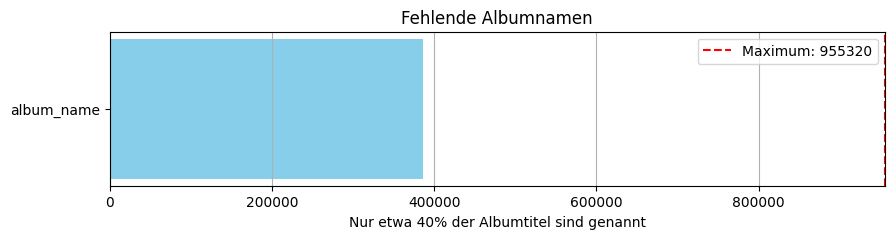

In [17]:
import matplotlib.pyplot as plt

# Werte definieren
max_value = 955320
filled_value = 385557

# Diagramm erstellen
plt.figure(figsize=(10, 2))
plt.barh('album_name', filled_value, color='skyblue')
plt.xlim(0, max_value)  # Setze die x-Achse auf das Maximum
plt.title('Fehlende Albumnamen')
plt.xlabel('Nur etwa 40% der Albumtitel sind genannt')
plt.grid(axis='x')
plt.axvline(x=max_value, color='red', linestyle='--', label='Maximum: 955320')
plt.legend()

plt.show()


In [18]:
# Zeilen mit fehlenden Werten in der Spalte 'lyrics' filtern
missing_lyrics = df2[df2['lyrics'].isnull()]

# Ausgabe der Zeilen mit fehlenden Werten in der Spalte 'lyrics'
print(missing_lyrics)

                            id                name                 album_name  \
103349  1rt7sXHRYJM8DbGeQbQyIx  Bota Fogo no Forró                        NaN   
124058  6wOIdueNYEFyJZkPwKABrT           Can't Run                        NaN   
150320  01pLWgtIIjqtrhpzEkE4bu   Come See About Me                        NaN   
169919  5eBj4lBOU7yeOTAi92VNk8  DMT - Original Mix               The Solution   
259313  5uS1cdODfMrF8HQAvp2712         Fiebertraum       Soundtracks: Dämonen   
270354  1wUpHXWWa45i61wmRWeJsK       For Your Love                        NaN   
410557  1ppmizf1Zdg4otSlDu7Vq0                Jona       Soundtracks: Dämonen   
420151  6lhvZrzp6BcLpiopTNWbyO     Keep on Talking                        NaN   
536920  3fk19pTzLrN4LKE7UVgWPs                Nato                        NaN   
701431  1BaJ6jtfUmhbNlzBIcwby4           Slaughter  Detritus of the Final Age   
837740  5eO6JxtgN044F0xru5mBJr           Ultimatum                        NaN   
889180  01yTjNHcWl2Qg09Gp4Xe

Ich habe in die Songs reingehört: Nur etwa die Hälfte der hier angegebenen Songs sind instrumentale Tracks, beim Rest fehlen die Texte. Diese Songs werden für die Analyse aus dem DataFrame entfernt.

In [19]:
# Fehlende Einträge in 'lyrics' suchen
missing_lyrics = df2[df2['lyrics'].isnull()]

# Entferne die identifizierten Zeilen aus df2
df2 = df2.drop(missing_lyrics.index)

# Optional: Ausgabe der Anzahl der verbleibenden Zeilen
print(f"Anzahl der verbleibenden Zeilen in df_merged nach dem Entfernen der fehlenden Werte: {df2.shape[0]}")

Anzahl der verbleibenden Zeilen in df_merged nach dem Entfernen der fehlenden Werte: 955307


In [20]:
missing_names = df2[df2['name'].isnull() | df2['artists'].isnull()]
print(missing_names)

                            id name album_name            artists  \
556124  2Q5cMgzptSupzvvWtZTyVg  NaN        NaN       The Duskfall   
556125  7BGQCe62A58Q5ZgpQFX93t  NaN        NaN  Elevation Worship   
955311  13vP95VYqHp3dN6TjGZ12s  NaN        NaN    ['Strangeways']   
955312  1KFjbnC7IRtkCh5MEJhWt9  NaN        NaN    ['mikeeysmind']   
955313  3VKFip3OdAvv4OfNTgFWeQ  NaN        NaN                NaN   
955314  3bN0ClUvRz8289XE7tNW0k  NaN        NaN         ['Keench']   
955315  4zMgP1HJazJJdEf6AiG8M6  NaN        NaN       ['SuperKek']   
955316  5N0MQFuudsDIQpapNI5MHM  NaN        NaN       ['Prasewon']   
955317  5R8xbq4SXB5Cc62Lu7cW4y  NaN        NaN    ['SoulkaOuter']   
955318  5cjecvX0CmC9gK0Laf5EMQ  NaN        NaN                NaN   
955319  7gi1gHXljCBwbBAF7Rhdwk  NaN        NaN        ['Jenkiss']   

        danceability  energy   key  loudness   mode  speechiness  \
556124         0.366   0.942     7    -5.425      1       0.0882   
556125         0.287   0.446     F 

Wir versuchen, die Daten zu vervollständigen und Künstlername, bzw. Songtitel von Spotify zu beziehen:

In [21]:
"""
import requests
import json

client_id = '...'  
client_secret = '...' 

# Abrufen des Access Tokens
url = 'https://accounts.spotify.com/api/token'
headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
}
data = {
    'grant_type': 'client_credentials',
}
response = requests.post(url, headers=headers, data=data, auth=(client_id, client_secret))
access_token = response.json().get('access_token')

# Liste der Song-IDs
track_ids = [
    '2Q5cMgzptSupzvvWtZTyVg',
    '7BGQCe62A58Q5ZgpQFX93t',
    '13vP95VYqHp3dN6TjGZ12s',
    '1KFjbnC7IRtkCh5MEJhWt9',
    '3VKFip3OdAvv4OfNTgFWeQ',
    '3bN0ClUvRz8289XE7tNW0k',
    '4zMgP1HJazJJdEf6AiG8M6',
    '5N0MQFuudsDIQpapNI5MHM',
    '5R8xbq4SXB5Cc62Lu7cW4y',
    '5cjecvX0CmC9gK0Laf5EMQ',
    '7gi1gHXljCBwbBAF7Rhdwk'
]

# Abrufen von Song-Informationen und Ausgabe
for track_id in track_ids:
    url = f'https://api.spotify.com/v1/tracks/{track_id}'
    headers = {
        'Authorization': f'Bearer {access_token}',
    }
    response = requests.get(url, headers=headers)
    track_info = response.json()
    
    title = track_info.get('name')
    artists = ', '.join(artist['name'] for artist in track_info.get('artists', []))
    print(f'Titel: {title}, Künstler: {artists}')


"""
print()

Für diese ausgewählten IDs gibt es keine weiteren Informationen über Künstler und Titel. Da für diese Analyse aber vor Allem die Spotify-Attribute und die Songtexte interessant sind, bleiben sie im Datensatz.

## Suche nach Duplikaten

Durch die Ausgabe von "head" fiel mir auf, dass es Duplikate gibt wird, ich lasse sie hier zählen:

In [22]:
duplicate_count = df2.duplicated(keep='first').sum()
print(f'Anzahl der Duplikate: {duplicate_count}')

Anzahl der Duplikate: 0


Anscheinend gibt es keine Zeilen, in denen alle Spalten übereinstimmen, also enge ich die Suche ein: Da es um Songs geht, halte ich "artists" und "name" für eine gute Kategorie. 
Der gleiche Künstler wird wahrscheinlich nicht noch ein mal einen anderen, aber gleichnamigen Song veröffentlichen. Aber möglicherweise gibt es von dem Song eine Live-Version oder er wurde auf einem anderen Album (zum Beispiel einem Best of) noch mal veröffentlicht. Ganz werden sich Duplikate nicht ausschließen lassen, ohne eine sehr große Menge von Abgleichen zu überprüfen. Aber mit dieser Methode lassen sich zumindest die offensichtlichen Mehrfachveröffentlichungen eines Songs ausschließen.

In [23]:
# Duplikate, bei denen 'artists' und 'name' gleich sind suchen
duplicate_count = df2.duplicated(subset=['artists', 'name'], keep='first').sum()
print(f'Anzahl der Duplikate: {duplicate_count}')

Anzahl der Duplikate: 69831


In [24]:
print("Anzahl der Zeilen vorher:", df2.shape[0])

# nur den ersten Eintrag behalten
unique_df2 = df2.drop_duplicates(subset=['artists', 'name'], keep='first').copy()

# Namen normalisieren
unique_df2['artists_normalized'] = unique_df2['artists'].str.lower().str.strip()
unique_df2['name_normalized'] = unique_df2['name'].str.lower().str.strip()

# Duplikate basierend auf den neuen Spalten entfernen
unique_df2 = unique_df2.drop_duplicates(subset=['artists_normalized', 'name_normalized'], keep='first')

# Ausgabe des aktualisierten DataFrames
print("Anzahl der Zeilen nach dem Entfernen von Duplikaten:", unique_df2.shape[0])
print(unique_df2.head(20))

Anzahl der Zeilen vorher: 955307
Anzahl der Zeilen nach dem Entfernen von Duplikaten: 879821
                        id                                               name  \
0   0Prct5TDjAnEgIqbxcldY9                                                  !   
1   2ASl4wirkeYm3OWZxXKYuq                                                 !!   
2   69lcggVPmOr9cvPx9kLiiN                                    !!! - Interlude   
3   4U7dlZjg1s9pjdppqZy0fm                                     !!De Repente!!   
5   5tA3ImW310llKo8EMBj2Ga                                !!Noble Stabbings!!   
6   0fROT4kK5oTm8xO8PX6EJF                                     !I'll Be Back!   
7   1xBFhv5faebv3mmwxx7DnS                                             !Lost!   
8   0gNNToCW3qjabgTyBSjt3H                          !Que Vida! - Mono Version   
9   6LrefSCg9Vnn1ckCeJkmbA                      !Viva el Mal Viva el Capital!   
10  1SCFa6gt3r6juLsIqpdwY3                                         !liaF cipE   
11  1JrpMwlzPuWg

Einige Duplikate wurden entfernt. Aber man sieht, dass immer noch einige vorhanden sind. 

Zum Beispiel ist der Song "40" von U2 in verschiedenen Versionen (Live,  "40", "40" - Live, "40" - Remastered 2008) noch nicht herausgefiltert wurde. Dieses Beispiel zeigt, dass das einfache Filtern nach Titel und Künstler auch seine Grenzen hat. Der nächste Schritt wäre jetzt nach Teilen von Titeln von gleichen Künstlern zu suchen - schauen wir mal, in wie vielen Titeln "40" vorkommt:

In [25]:
filtered_rows = df2[df2['name'].str.contains("40", na=False)]
sampled_rows = filtered_rows[['name', 'artists']].sample(n=20, random_state=1)

# Ausgabe des Samples
print(sampled_rows)
print("\n\nAnzahl der Songs mit '40' im Titel: ", filtered_rows.shape[0])

                                                     name  \
436126  La vierge au Dodge 51 - 40 ans de chansons sur...   
8420                                         40 oz. Dream   
38104   Alligators 427 - 40 ans de chansons sur scène ...   
8385    40 Graus / Gamei / Azul Sem Fim / Até o Sol Qu...   
435101  La dèche, le twist & le reste - 40 ans de chan...   
889755  Why Does Love Got To Be So Sad? - 40th Anniver...   
817059  Toboggan - 40 ans de chansons sur scène à l'Ac...   
218157                                        E-40 & C-Bo   
8386                                     40 Graus De Amor   
724015                           Sprinkle Me (feat. E-40)   
767612                      The Anarchist - Live R40 Tour   
112102                 Bug (feat. Lil 40 & Pretty Savage)   
680418  Serse, HWV 40 / Act 1: Frondi tenere, e belle....   
16230                                A Pirate Looks at 40   
11147   A Bay Bay (The Ratchet Remix) (feat. The Game,...   
19                      

Der Titel "40" ist sehr kurz, es wäre nicht gut, nach nur zwei Zeichen zu suchen, damit würden andere Titel die ähnlich heißen auch gefiltert werden.

Im Output oben fällt auf, dass es zwei Titel vom selben Künstler gibt, bei denen der Songname teilweise gleich ist:

435420  La maison Borniol - 40 ans de chansons sur scè...   ['Hubert-Félix Thiéfaine']  
435841  La ruelle des morts - 40 ans de chansons sur s...   ['Hubert-Félix Thiéfaine'] 

Es sind aber zwei verschiedene Stücke. 
Ich versuche weiter zu filtern und vergleiche die ersten 15 Zeichen des Titels und den Artist-Name.

In [26]:
# Kopie erstellen
unique_df2_copy = unique_df2.copy()

# Neue Spalte mit den ersten 15 Zeichen der normalisierten name-Spalte erstellen
unique_df2_copy.loc[:, 'name_prefix'] = unique_df2_copy['name_normalized'].str[:15]

# Duplikate finden
duplicates = unique_df2_copy.groupby(['artists_normalized', 'name_prefix']).filter(lambda x: len(x) > 1)

# Ausgabe der Duplikate
print(duplicates.sort_values(by=['name']).head(20))
print("Anzahl der gefundenen Zeilen:", duplicates.shape[0])


                         id  \
52   2lKBg3U2gaawCQZEie5lxp   
53   6L1PUtG3JcH80oWSD9H8DO   
151  5R8AxQGJ5oAsaJMRJzhtVg   
152  0bWVG3SHpVPzNDwNeMasTV   
505  5UVXLUq8m3CnehQ283wkrv   
506  6ee1motyT1KuUMiz8dMqxj   
513  1IbUbINxfCoZ3XZvm1jZed   
516  3dgpLSZlacfOVPAjiXRIfS   
584  1u0zZAXlVIcMqBDBpsZecV   
586  4RRDveBn3JTyJ5BIEBTDfV   
600  4DbfcIG8Izb4pSnyeKr4ql   
602  2DnqvGQYmJq2QXhWVoZfBi   
661  1wl5b2lw3YagQtZiYZbQWP   
670  5RSXReQAtEicL9PhQphKw2   
672  1y1QzL2PfuU0kUJfwkL8iB   
673  1oXBulkrwnsySKDgDxfbMa   
714  2jbADSsjJm5LZtXNXsXxqJ   
715  2xN3aE5x5Xu8XAv2FSo98p   
724  1Tg8HD9JMAsWGqGRdtx2ig   
729  3VGlhhVUTHk0OVyOmAYOoU   

                                                  name  \
52            "Cassius" Love Vs. "Sonny" Wilson (Mono)   
53   "Cassius" Love Vs. "Sonny" Wilson - Remastered...   
151  "Push It To The Limit" from the Motion Picture...   
152  "Push It to the Limit" from the Motion Picture...   
505                                '54, '74, '90, 2006   


Das Ergebnis sieht gut aus. Obwohl mit dieser Methode natürlich auch die Gefahr besteht, zu viele Titel herauszufiltern, die ähnliche Titelnamen haben, finden sich hier viele Duplikate.
Diese Duplikate werden aus dem DataFrame gelöscht.

In [27]:
print("Zeilen Vorher:", unique_df2.shape[0])

# Neue Spalte mit den ersten 15 Zeichen der normalisierten name-Spalte erstellen
unique_df2.loc[:, 'name_prefix'] = unique_df2['name_normalized'].str[:15]

# Duplikate entfernen
unique_df2 = unique_df2.drop_duplicates(subset=['artists_normalized', 'name_prefix'], keep='first')

# Ausgabe des aktualisierten DataFrames
print(unique_df2.head(20))
print("Zeilen nachher:", unique_df2.shape[0])

Zeilen Vorher: 879821
                        id                                               name  \
0   0Prct5TDjAnEgIqbxcldY9                                                  !   
1   2ASl4wirkeYm3OWZxXKYuq                                                 !!   
2   69lcggVPmOr9cvPx9kLiiN                                    !!! - Interlude   
3   4U7dlZjg1s9pjdppqZy0fm                                     !!De Repente!!   
5   5tA3ImW310llKo8EMBj2Ga                                !!Noble Stabbings!!   
6   0fROT4kK5oTm8xO8PX6EJF                                     !I'll Be Back!   
7   1xBFhv5faebv3mmwxx7DnS                                             !Lost!   
8   0gNNToCW3qjabgTyBSjt3H                          !Que Vida! - Mono Version   
9   6LrefSCg9Vnn1ckCeJkmbA                      !Viva el Mal Viva el Capital!   
10  1SCFa6gt3r6juLsIqpdwY3                                         !liaF cipE   
11  1JrpMwlzPuWgfmGiIBi9QI                                                " "   
12  0w

Jetzt überprüfe ich, ob Songtexte doppelt vorkommen. Zuerst suche ich nach der Kombination Songtitel und Lyrics. Das betrifft dann auch Coversongs.

In [28]:
print("vorher:",unique_df2.shape[0])
unique_df2_copy = unique_df2.copy()

# normalisierte Lyrics-Spalte erstellen
unique_df2_copy.loc[:, 'lyrics_normalized'] = unique_df2_copy['lyrics'].str.lower().str.strip()

# Duplikate entfernen
unique_df2_copy = unique_df2_copy.drop_duplicates(subset=['name_normalized', 'lyrics_normalized'], keep='first')

# Aktualisiere unique_df2 mit den bereinigten Werten
unique_df2 = unique_df2_copy

print("nachher:", unique_df2.shape[0])

vorher: 847835
nachher: 813294


Jetzt suche ich nur nach doppelten Lyrics.

In [29]:
# Finde die Duplikate basierend auf 'lyrics'
duplicate_lyrics = unique_df2['lyrics_normalized'].duplicated(keep=False)

# Filtere die Zeilen mit Duplikaten in der Spalte 'lyrics'
duplicate_rows = unique_df2[duplicate_lyrics]

# Sortiere die Duplikate nach 'lyrics'
duplicate_rows_sorted = duplicate_rows.sort_values(by=['lyrics_normalized'])

# Ausgabe der ersten 20 Zeilen, die Duplikate in der Spalte 'lyrics' haben
print("Zeilen mit Duplikaten in 'lyrics_normalized':")
print(duplicate_rows_sorted.head(20))
print("Anzahl der Duplikate:", duplicate_rows_sorted.shape[0])


Zeilen mit Duplikaten in 'lyrics_normalized':
                            id  \
492331  0tTlIQ90geYyszZT7B4onT   
492320  07VNk1lckzSGDuUJHsYNBK   
140478  6FrOXkvqFypmngDELuUX71   
140477  7w3NfqqpKCF0PEZHE91u3X   
346708  5c6D62O1O1zMVK4C489Eaq   
105584  1OKgBZhaFdP32X1jZsbwRF   
611159  1ORFX0Ydw9aLcDVo4vHg2n   
611163  3GMeSiQOA6h2wyABy7yRO7   
6692    5erunxkXBEGgexYFmtEE86   
6701    6rfDfQfz2WUvSRiVKMwfU9   
265429  0oHH9pt7O822uyspUQW0NW   
265427  21YOckAhFXaKLxZGZa6nzq   
254550  7n3wyT4UyfLY2Fc9D0VVLP   
254549  36rRih68mwsESRhPdDtMB2   
483352  48C219M8L2HGsFTLudljk5   
483342  0STcxCpVhpSDJdGIgzsq48   
293167  5YmFwSNbZPZBOLsuQzyNWh   
293168  7s7ojmrvFe0Tg1OCEub1g0   
277398  2ZVUI83XsxFblN3quCE8QU   
277397  4bjOes4xHKSBNNp5W069Ib   

                                                     name  \
492331                      March (Live from Soiled Dove)   
492320                                              March   
140478             Christmas Wrapping (Glee Cast Version

Und tatsächlich gibt es noch 36006 doppelte Lyrics. Diese werden entfernt.

In [30]:
print("vorher:", unique_df2.shape[0])
unique_df2_copy = unique_df2.copy()

# Duplikate basierend auf 'lyrics_normalized' finden und nur eine Version behalten
unique_df2_copy = unique_df2_copy[~unique_df2_copy['lyrics_normalized'].duplicated(keep='first')]

# Entferne die normalisierte Spalte, um die Originalspalten beizubehalten
unique_df2_copy = unique_df2_copy.drop(columns=['lyrics_normalized'])

# Aktualisiere unique_df2 mit den bereinigten Werten
unique_df2 = unique_df2_copy

print("nach dem Löschen der Duplikate:", unique_df2.shape[0])

vorher: 813294
nach dem Löschen der Duplikate: 794360


Somit haben wir von den 955320 Anfangssongs etwa 150.000 Duplikate und ein paar fehlende Werte herausfiltern können, was die Gesamtzahl um 16,8% der Songs reduziert hat. Sicher sind noch viele weitere Duplikate in dem Datensatz vorhanden, die man mit viel Aufwand noch auffinden könnte, aber für dieses Projekt soll das erstmal reichen.

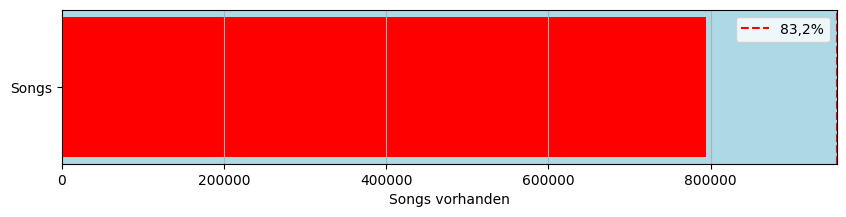

In [31]:
import matplotlib.pyplot as plt

# Erstelle Diagramm
max_value = 955320
filled_value = 794360
plt.figure(figsize=(10, 2))
plt.barh('Songs', filled_value, color='red')  # Balkenfarbe auf rot ändern
plt.xlim(0, max_value)  # Setze die x-Achse auf das Maximum
plt.xlabel('Songs vorhanden')
plt.grid(axis='x')
plt.axvline(x=max_value, color='red', linestyle='--', label='83,2%')
plt.legend()
plt.gca().set_facecolor('lightblue')

plt.show()

## Daten zusammenführen: passende IDs

Im nächsten Schritt versuche ich, die beiden Datensätze zusammenzuführen, um die Textanalyse auf die Auswahl der besonders erfolgreichen Songs im Datensatz anzuwenden. 
Dazu versuche ich im ersten Schritt, die Daten anhand der Spotify-IDs zusammenzuführen, im zweiten Schritt die Daten anhand der Kombination aus Titelname und Künstlername zusammenzuführen. 

Versuche, über eine API von Songdatenbanken die passenden Songtexte herunterzuladen sind leider fehlgeschlagen.

In [32]:
import pandas as pd

# Spalte 'Track URI' in df1 extrahieren
df1_filtered['Track ID'] = df1_filtered['Track URI'].str.split(':').str[-1]

# Lyrics-Spalte für die passenden ids hinzufügen
df_merged = df1_filtered.merge(df2[['id', 'lyrics']], left_on='Track ID', right_on='id', how='left')

# nur die Zeilen mit lyrics behalten
df_merged = df_merged[df_merged['lyrics'].notnull()]

print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4990 entries, 1 to 9989
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             4990 non-null   object 
 1   Track Name            4990 non-null   object 
 2   Artist URI(s)         4990 non-null   object 
 3   Artist Name(s)        4990 non-null   object 
 4   Album URI             4990 non-null   object 
 5   Album Name            4990 non-null   object 
 6   Album Artist URI(s)   4990 non-null   object 
 7   Album Artist Name(s)  4990 non-null   object 
 8   Album Release Date    4990 non-null   object 
 9   Album Image URL       4990 non-null   object 
 10  Disc Number           4990 non-null   int64  
 11  Track Number          4990 non-null   int64  
 12  Track Duration (ms)   4990 non-null   int64  
 13  Track Preview URL     4984 non-null   object 
 14  Explicit              4990 non-null   bool   
 15  Popularity            4990

#### Zwischenstand: df_merged beinhaltet 4990 entries, vielleicht finden sich noch mehr

#### Suchen von gleichen Titeln, bei denen die IDs nicht übereinstimmen, aber Titel, Artist und Album

In [33]:
import pandas as pd

# filtere nach Zeilen, die in Track Name und Artist Name gleich sind
df1_filtered = df1_filtered[~df1_filtered.set_index(['Track Name', 'Artist Name(s)']).index.isin(
    df_merged.set_index(['Track Name', 'Artist Name(s)']).index
)]

# zweiter Merge-Join, um die lyrics-Spalte hinzuzufügen
new_rows = df1_filtered.merge(df2[['name', 'artists', 'lyrics']], 
                               left_on=['Track Name', 'Artist Name(s)'], 
                               right_on=['name', 'artists'], 
                               how='left')

# behalte nur die Zeilen mit lyrics
new_rows = new_rows[new_rows['lyrics'].notnull()]
print(f"Anzahl der neuen Zeilen mit Lyrics: {new_rows.shape[0]}\n")

# zusätzliche Spalten entfernen
new_rows.drop(columns=['name', 'artists'], inplace=True)

# Schritt 8: Füge die neuen Zeilen zu df_merged hinzu
df_merged = pd.concat([df_merged, new_rows], ignore_index=True)
df_merged2 = df_merged.copy()

# Duplikate entfernen, basierend auf der Spalte 'Track ID'
df_merged = df_merged.drop_duplicates()

# Duplikate entfernen
df_merged.drop(columns=['id', 'Track ID'], inplace=True)

# df_merged enthält jetzt die ursprünglichen Daten und die neuen Zeilen mit lyrics
df_merged.info()


Anzahl der neuen Zeilen mit Lyrics: 1272

<class 'pandas.core.frame.DataFrame'>
Index: 5999 entries, 0 to 6261
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             5999 non-null   object 
 1   Track Name            5999 non-null   object 
 2   Artist URI(s)         5999 non-null   object 
 3   Artist Name(s)        5999 non-null   object 
 4   Album URI             5999 non-null   object 
 5   Album Name            5999 non-null   object 
 6   Album Artist URI(s)   5999 non-null   object 
 7   Album Artist Name(s)  5999 non-null   object 
 8   Album Release Date    5999 non-null   object 
 9   Album Image URL       5999 non-null   object 
 10  Disc Number           5999 non-null   int64  
 11  Track Number          5999 non-null   int64  
 12  Track Duration (ms)   5999 non-null   int64  
 13  Track Preview URL     5989 non-null   object 
 14  Explicit              5999 non-null

## Ende: 5999 von 10.000 Songs mit Lyrics verknüpft

Ich habe in df_merged 5999 der 10.000 Songs aus df1 mit den Songtexten aus df2 verknüpfen können. 
Damit haben wir 5999 Hit-Songs mit Lyrics und können diese in einem späteren Schritt analysieren und mit den fast 800.000 Lyrics des anderen DataFrames vergleichen.
Jetzt wird diese Datei auch noch mal gesäubert, fehlende Werte und überflüssige Spalten entfernt:

In [34]:
# Identifiziere die Zeilen mit fehlenden Werten in 'Track Name' oder 'Artist Name(s)'
missing_values = df_merged[df_merged['Track Name'].isnull() | df_merged['Artist Name(s)'].isnull()]

# Entferne die identifizierten Zeilen aus df_merged
df_merged = df_merged.drop(missing_values.index)

# Optional: Ausgabe der Anzahl der verbleibenden Zeilen
print(f"Anzahl der verbleibenden Zeilen in df_merged nach dem Entfernen der fehlenden Werte: {df_merged.shape[0]}")

Anzahl der verbleibenden Zeilen in df_merged nach dem Entfernen der fehlenden Werte: 5999


So können wir mit df_merged arbeiten. Damit ist die Aufbereitung der Daten abgeschlossen und die Analyse kann beginnen. Jetzt werden noch mal alle Daten als csv exportiert, um im nächsten Notebook damit zu arbeiten.

## Speichern

In [35]:
unique_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794360 entries, 0 to 955319
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  794360 non-null  object 
 1   name                794351 non-null  object 
 2   album_name          307373 non-null  object 
 3   artists             794360 non-null  object 
 4   danceability        794360 non-null  float64
 5   energy              794360 non-null  float64
 6   key                 794360 non-null  object 
 7   loudness            794360 non-null  float64
 8   mode                794360 non-null  object 
 9   speechiness         794360 non-null  float64
 10  acousticness        794360 non-null  float64
 11  instrumentalness    794360 non-null  float64
 12  liveness            794360 non-null  float64
 13  valence             794360 non-null  float64
 14  tempo               794360 non-null  float64
 15  duration_ms         794360 non-null  fl

In [36]:
unique_df2 = unique_df2.drop(columns=['artists_normalized','name_normalized', 'name_prefix'])

In [37]:
unique_df2.info()
unique_df2.to_csv('unique_df2.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 794360 entries, 0 to 955319
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                794360 non-null  object 
 1   name              794351 non-null  object 
 2   album_name        307373 non-null  object 
 3   artists           794360 non-null  object 
 4   danceability      794360 non-null  float64
 5   energy            794360 non-null  float64
 6   key               794360 non-null  object 
 7   loudness          794360 non-null  float64
 8   mode              794360 non-null  object 
 9   speechiness       794360 non-null  float64
 10  acousticness      794360 non-null  float64
 11  instrumentalness  794360 non-null  float64
 12  liveness          794360 non-null  float64
 13  valence           794360 non-null  float64
 14  tempo             794360 non-null  float64
 15  duration_ms       794360 non-null  float64
 16  lyrics            794360 

In [39]:
df_merged.info()
df_merged.to_csv('df_merged.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 5999 entries, 0 to 6261
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             5999 non-null   object 
 1   Track Name            5999 non-null   object 
 2   Artist URI(s)         5999 non-null   object 
 3   Artist Name(s)        5999 non-null   object 
 4   Album URI             5999 non-null   object 
 5   Album Name            5999 non-null   object 
 6   Album Artist URI(s)   5999 non-null   object 
 7   Album Artist Name(s)  5999 non-null   object 
 8   Album Release Date    5999 non-null   object 
 9   Album Image URL       5999 non-null   object 
 10  Disc Number           5999 non-null   int64  
 11  Track Number          5999 non-null   int64  
 12  Track Duration (ms)   5999 non-null   int64  
 13  Track Preview URL     5989 non-null   object 
 14  Explicit              5999 non-null   bool   
 15  Popularity            5999

Im nächsten Notebook geht es weiter zur Datenanalyse.